# **Installing the pip package for quantile forest**

In [6]:
!pip install quantile-forest

## **Import required libraries**

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from quantile_forest import RandomForestQuantileRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# **Simulated healthcare dataset**

In [8]:
np.random.seed(42)
n_patients = 1000
X_health = np.random.rand(n_patients, 5)  # 5 clinical features
y_health = X_health[:, 0] * 5 + np.random.randn(n_patients) * 2  # Simulated length of stay in days

# **Train-Test Split**

In [9]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_health, y_health, test_size=0.2, random_state=42)

## **Train Quantile Random Forest for length of stay prediction**

In [10]:
# Train Quantile Random Forest for length of stay prediction
qrf_health = RandomForestQuantileRegressor(random_state=42, n_estimators=100)
qrf_health.fit(X_train_h, y_train_h)


RandomForestQuantileRegressor(random_state=42)

# **Predict quantiles for patient stay duration**

In [11]:

quantiles_health = [0.1, 0.5, 0.9]
length_of_stay_preds = qrf_health.predict(X_test_h, quantiles=quantiles_health)

In [12]:
# Output predictions for different quantiles
length_of_stay_df = pd.DataFrame({
    '10th Percentile Stay (Short)': length_of_stay_preds[:, 0],
    '50th Percentile Stay (Median)': length_of_stay_preds[:, 1],
    '90th Percentile Stay (Long)': length_of_stay_preds[:, 2],
    'Actual Stay': y_test_h
})
print(length_of_stay_df.head())

   10th Percentile Stay (Short)  50th Percentile Stay (Median)  \
0                      0.720882                       1.742880   
1                      0.784211                       3.073247   
2                      0.259035                       2.052850   
3                     -0.305635                       0.772265   
4                      0.267215                       3.340041   

   90th Percentile Stay (Long)  Actual Stay  
0                     6.020297     4.881323  
1                     5.407668     3.331541  
2                     5.494339     5.999387  
3                     4.219653     5.437494  
4                     5.201470    -0.000676  


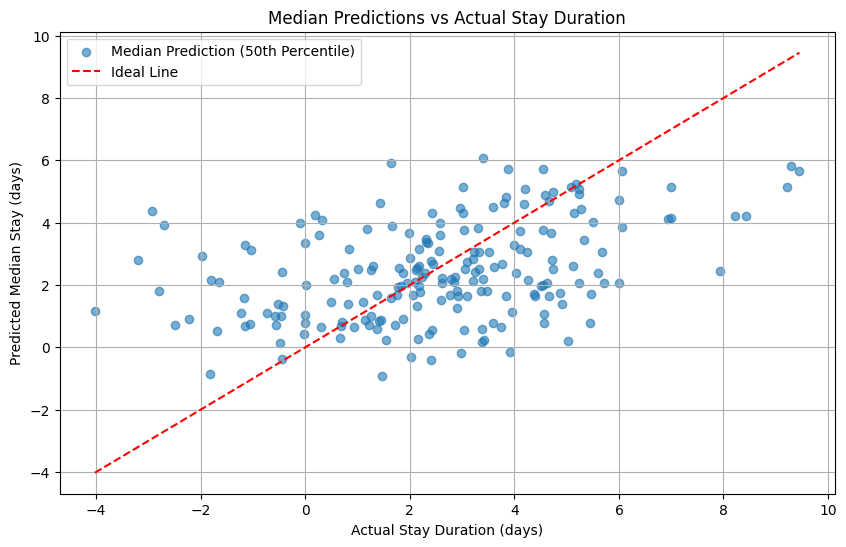

In [13]:
# 1. Scatter Plot of Median Predictions vs Actual Stay
plt.figure(figsize=(10, 6))
plt.scatter(length_of_stay_df['Actual Stay'], length_of_stay_df['50th Percentile Stay (Median)'], alpha=0.6, label='Median Prediction (50th Percentile)')
plt.plot([min(y_test_h), max(y_test_h)], [min(y_test_h), max(y_test_h)], color='red', linestyle='--', label='Ideal Line')
plt.title('Median Predictions vs Actual Stay Duration')
plt.xlabel('Actual Stay Duration (days)')
plt.ylabel('Predicted Median Stay (days)')
plt.legend()
plt.grid(True)
plt.show()

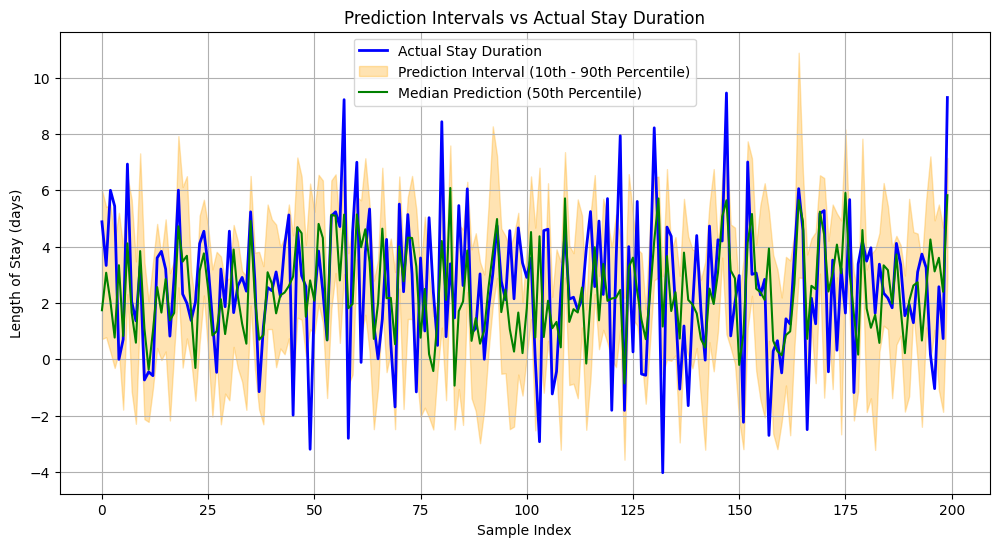

In [14]:
# 2. Plot of Prediction Intervals (10th to 90th percentile) vs Actual Stay
plt.figure(figsize=(12, 6))
plt.plot(length_of_stay_df['Actual Stay'].values, label='Actual Stay Duration', color='blue', linewidth=2)
plt.fill_between(np.arange(len(y_test_h)), length_of_stay_df['10th Percentile Stay (Short)'], length_of_stay_df['90th Percentile Stay (Long)'], color='orange', alpha=0.3, label='Prediction Interval (10th - 90th Percentile)')
plt.plot(length_of_stay_df['50th Percentile Stay (Median)'], color='green', linestyle='-', label='Median Prediction (50th Percentile)')
plt.title('Prediction Intervals vs Actual Stay Duration')
plt.xlabel('Sample Index')
plt.ylabel('Length of Stay (days)')
plt.legend()
plt.grid(True)
plt.show()

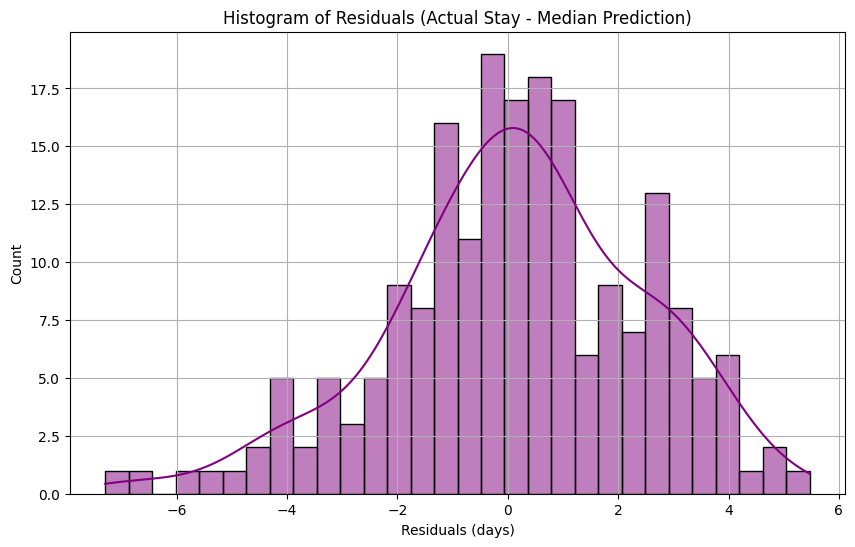

In [15]:
# 3. Histogram of Residuals (errors) between median predictions and actual stay
residuals_health = length_of_stay_df['Actual Stay'] - length_of_stay_df['50th Percentile Stay (Median)']
plt.figure(figsize=(10, 6))
sns.histplot(residuals_health, kde=True, bins=30, color='purple')
plt.title('Histogram of Residuals (Actual Stay - Median Prediction)')
plt.xlabel('Residuals (days)')
plt.grid(True)
plt.show()


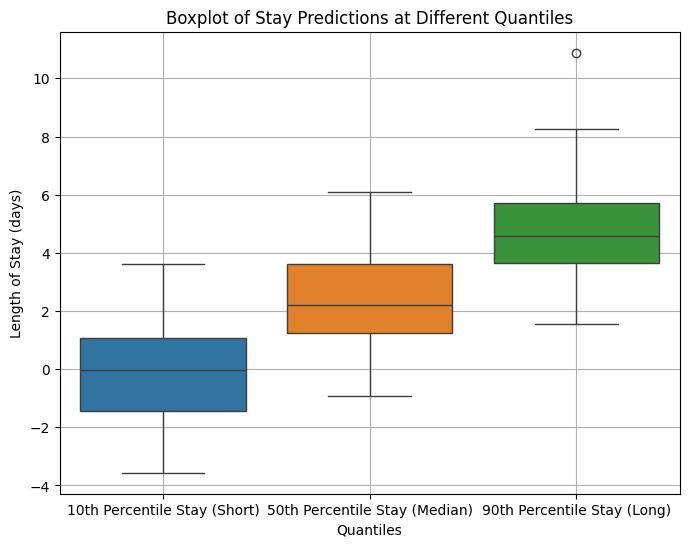

In [16]:
# 4. Boxplot showing the spread of predictions at different quantiles
plt.figure(figsize=(8, 6))
sns.boxplot(data=length_of_stay_df[['10th Percentile Stay (Short)', '50th Percentile Stay (Median)', '90th Percentile Stay (Long)']])
plt.title('Boxplot of Stay Predictions at Different Quantiles')
plt.xlabel('Quantiles')
plt.ylabel('Length of Stay (days)')
plt.grid(True)
plt.show()